In [143]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from geopy.distance import geodesic

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

In [144]:
# load train and test data

# train set
df_mess_train = pd.read_csv('mess_train_list.csv')

# test set
df_mess_test = pd.read_csv('mess_test_list.csv')

# position associated to train set
pos_train = pd.read_csv('pos_train_list.csv') 

In [145]:
np.unique(df_mess_train['bsid'])

array([  879,   911,   921,   944,   980,  1012,  1086,  1092,  1120,
        1148,  1156,  1187,  1226,  1229,  1235,  1237,  1264,  1266,
        1268,  1292,  1334,  1344,  1432,  1443,  1447,  1463,  1476,
        1526,  1530,  1534,  1581,  1594,  1661,  1730,  1741,  1743,
        1772,  1796,  1826,  1828,  1838,  1852,  1854,  1859,  1872,
        1878,  1971,  1987,  1988,  1994,  1996,  2189,  2293,  2605,
        2610,  2611,  2617,  2693,  2707,  2731,  2737,  2762,  2765,
        2766,  2768,  2770,  2775,  2776,  2780,  2784,  2790,  2799,
        2800,  2803,  2808,  2831,  2836,  2837,  2841,  2842,  2845,
        2846,  2849,  2855,  2862,  2943,  2945,  2999,  3025,  3041,
        3051,  3256,  3357,  3378,  3385,  3386,  3389,  3402,  3403,
        3410,  3412,  3414,  3415,  3500,  3501,  3515,  3526,  3527,
        3529,  3535,  3536,  3538,  3544,  3545,  3546,  3547,  3548,
        3549,  3553,  3554,  3555,  3556,  3558,  3559,  3562,  3563,
        3565,  3568,

In [146]:
np.unique(df_mess_test['bsid'])

array([ 1012,  1086,  1092,  1131,  1264,  1268,  1292,  1334,  1344,
        1432,  1476,  1530,  1594,  1661,  1741,  1743,  1772,  1796,
        1826,  1854,  1859,  1872,  1878,  1987,  1988,  1994,  1996,
        2189,  2605,  2610,  2617,  2693,  2707,  2731,  2737,  2762,
        2768,  2776,  2784,  2790,  2799,  2831,  2837,  2841,  2842,
        2846,  2862,  2943,  2999,  3025,  3034,  3051,  3256,  3357,
        3378,  3386,  3389,  3402,  3403,  3410,  3412,  3414,  3415,
        3500,  3526,  3527,  3529,  3535,  3536,  3538,  3545,  3547,
        3548,  3553,  3554,  3555,  3556,  3558,  3559,  3562,  3563,
        3565,  3568,  3569,  3570,  3571,  3574,  3575,  3576,  3578,
        3579,  3581,  3629,  3828,  3835,  3846,  3907,  3983,  4047,
        4056,  4058,  4059,  4064,  4065,  4078,  4092,  4105,  4129,
        4147,  4148,  4156,  4157,  4205,  4244,  4646,  4819,  4966,
        4987,  4993,  7248,  7382,  7435,  7456,  7692,  7726,  7738,
        7789,  8082,

## Stations de base

In [147]:
# determine all Base stations that received at least 1 message
listOfBs = np.union1d(np.unique(df_mess_train['bsid']),
                      np.unique(df_mess_test['bsid'])) 

print(f"Number of stations: {len(listOfBs)}")

Number of stations: 259


In [154]:
df_mess_all = pd.concat([df_mess_train, df_mess_test])
df_bsloc_all = df_mess_all.groupby('bsid')[['bs_lat', 'bs_lng']].first()

lon_min = df_bsloc_all['bs_lng'].min()
lon_max = df_bsloc_all['bs_lng'].max()

lat_min = df_bsloc_all['bs_lat'].min()
lat_max = df_bsloc_all['bs_lat'].max()

print(f"lon (min / max) = {lon_min:.3f}, {lon_max:.3f}")
print(f"lat (min / max) = {lat_min:.3f}, {lat_max:.3f}")

df_bsloc_all.head()

lon (min / max) = -110.957, -68.500
lat (min / max) = 36.053, 64.300


,bs_lat,bs_lng
bsid,,
879,39.739013,-105.392793
911,42.324279,-107.159505
921,42.131222,-107.008741
944,41.424900,-106.143919
980,38.997730,-104.684275


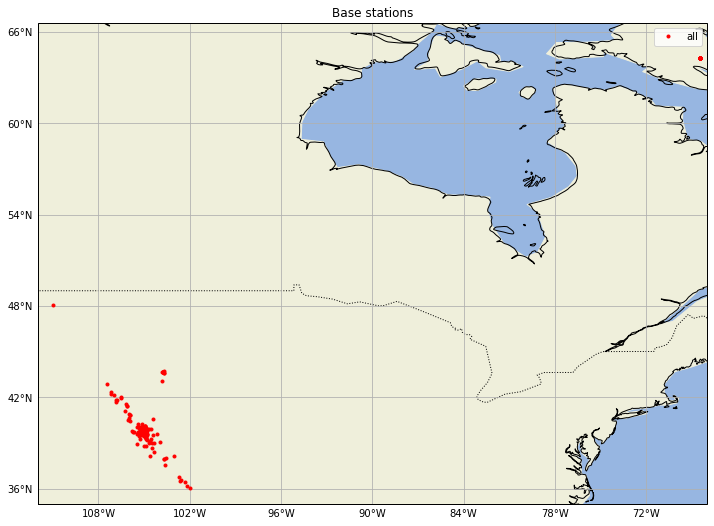

In [158]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

plt.grid()
ax.set_extent([round(lon_min - 1.), round(lon_max + 1.),
               round(lat_min - 1.), round(lat_max + 1.),])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, facecolor=cfeature.COLORS['land'])
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(resolution='50m')

# plot BS
ax.plot(df_bsloc_all['bs_lng'], df_bsloc_all['bs_lat'],
        '.', color='red', label='all')

ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_title("Base stations")
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

plt.legend()
plt.show()

### BS train vs BS test

In [8]:
df_bsloc_train = df_mess_train.groupby('bsid')[['bs_lat', 'bs_lng']].first()
df_bsloc_test = df_mess_test.groupby('bsid')[['bs_lat', 'bs_lng']].first()

df_bsloc_intersect = df_bsloc_train.merge(df_bsloc_test, how='inner',
                                          on=['bsid','bs_lat', 'bs_lng'] )

df_bsloc_train_only = pd.merge(df_bsloc_train, df_bsloc_test,
                               on=['bsid','bs_lat', 'bs_lng'],
                               how="outer", indicator=True) \
                        .query('_merge=="left_only"') \
                        .drop(columns=['_merge'])

df_bsloc_test_only = pd.merge(df_bsloc_test, df_bsloc_train,
                               on=['bsid','bs_lat', 'bs_lng'],
                               how="outer", indicator=True) \
                        .query('_merge=="left_only"') \
                        .drop(columns=['_merge'])

print(f"all={df_bsloc_all.shape}")
print(f"intersection={df_bsloc_intersect.shape}")
print(f"train_only={df_bsloc_train_only.shape}")
print(f"test_only{df_bsloc_test_only.shape}")

all=(259, 2)
intersection=(160, 2)
train_only=(91, 2)
test_only(8, 2)


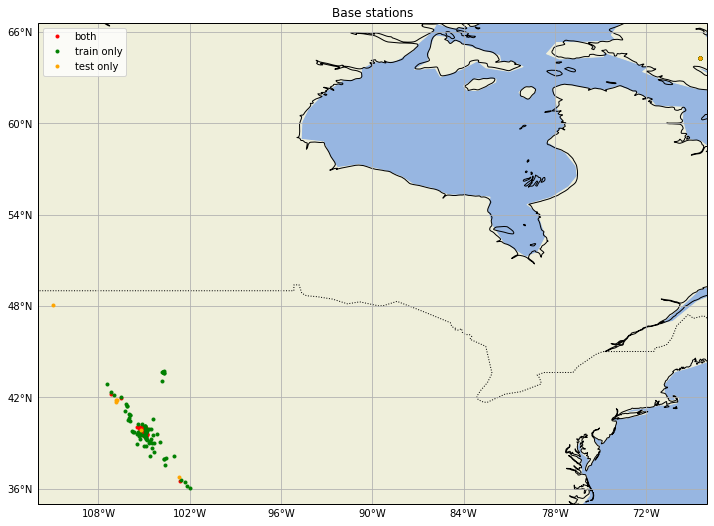

In [9]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

plt.grid()
ax.set_extent([round(lon_min - 1.), round(lon_max + 1.),
               round(lat_min - 1.), round(lat_max + 1.),])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, facecolor=cfeature.COLORS['land'])
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(resolution='50m')

# plot BS
ax.plot(df_bsloc_intersect['bs_lng'], df_bsloc_intersect['bs_lat'],
        '.', color='red', label='both')
ax.plot(df_bsloc_train_only['bs_lng'], df_bsloc_train_only['bs_lat'],
        '.', color='green', label='train only')
ax.plot(df_bsloc_test_only['bs_lng'], df_bsloc_test_only['bs_lat'],
        '.', color='orange', label='test only')

ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_title("Base stations")
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

plt.legend()
plt.show()

## Positions des émetteurs (train only)

In [10]:
pos_train.head()

,lat,lng
0,39.606690,-104.958490
1,39.606690,-104.958490
2,39.637741,-104.958554
3,39.730417,-104.968940
4,39.730417,-104.968940


In [11]:
pos_train.shape

(39250, 2)

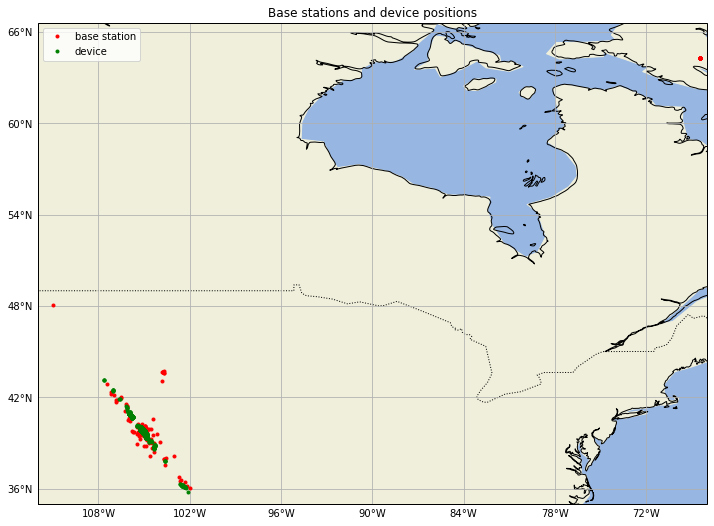

In [12]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

plt.grid()
ax.set_extent([round(lon_min - 1.), round(lon_max + 1.),
               round(lat_min - 1.), round(lat_max + 1.),])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, facecolor=cfeature.COLORS['land'])
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(resolution='50m')

# plot BS
ax.plot(df_bsloc_all['bs_lng'], df_bsloc_all['bs_lat'],
        '.', color='red', label='base station')
ax.plot(pos_train['lng'], pos_train['lat'],
        '.', color='green', label='device')

ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_title("Base stations and device positions")
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

plt.legend()
plt.show()

### anomalies

In [139]:
messid = df_mess_test[df_mess_test.bs_lat <60].messid.unique()

In [142]:
df_mess_train.messid.count()

39250

In [140]:
df_mess_test[df_mess_test.bs_lat > 60].isin(messid).messid.sum()

2964

In [132]:
df_mess_train[df_mess_train.bs_lat>60].nunique()

messid     1849
bsid         27
did          49
nseq          5
rssi        194
time_ux    1849
bs_lat        1
bs_lng        1
dtype: int64

In [13]:
df_except = df_mess_all[df_mess_all['bs_lat'] > 60]

print(f"Number of stations = {len(np.unique(df_except['bsid']))}")
print(f"Number of messages = {df_except.shape[0]}")

Number of stations = 29
Number of messages = 7458


### RSSI fonction de la distance

In [14]:
def vincenty_vec(vec_coord):
    """ Now using geodesic distance instead of Vincenty """
    vin_vec_dist = np.zeros(vec_coord.shape[0])
    if vec_coord.shape[1] != 4:
        print('ERROR: Bad number of columns (shall be = 4)')
    else:
        vin_vec_dist = [geodesic(vec_coord[m, 0:2], vec_coord[m, 2:]).meters for m in range(vec_coord.shape[0])]

    return vin_vec_dist

In [15]:
df_distance = pd.concat([df_mess_train, pos_train], axis=1)
df_distance.shape

(39250, 10)

In [16]:
df_distance.columns

Index(['messid', 'bsid', 'did', 'nseq', 'rssi', 'time_ux', 'bs_lat', 'bs_lng',
       'lat', 'lng'],
      dtype='object')

In [17]:
df_distance['distance_m'] = df_distance.apply(lambda x: geodesic([x['bs_lat'], x['bs_lng']], [x['lat'], x['lng']]).meters, axis=1)

In [18]:
df_distance = df_distance.sort_values(by=['distance_m'])

# near: distance <= 100 km
df_distance_near = df_distance[df_distance['distance_m'] <= 100000]
# far: distance > 100 km
df_distance_far = df_distance[df_distance['distance_m'] > 100000]

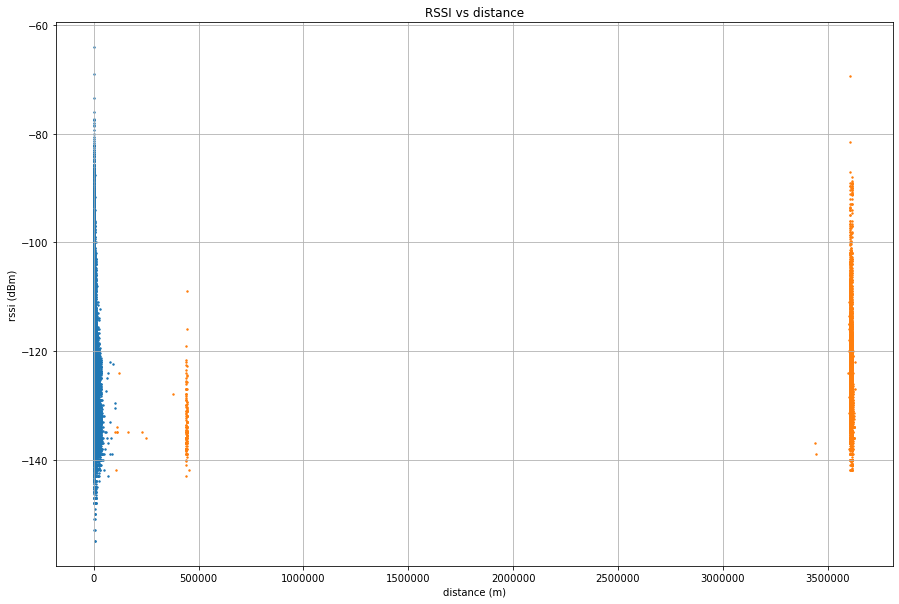

In [19]:
fig = plt.figure(figsize=(15, 10))

plt.grid()

plt.title('RSSI vs distance')
plt.xlabel('distance (m)')
plt.ylabel('rssi (dBm)')

plt.scatter(df_distance_near['distance_m'], df_distance_near['rssi'], s=2, label='near')
plt.scatter(df_distance_far['distance_m'], df_distance_far['rssi'], s=2, label='far')

plt.show()

In [20]:
df_distance

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng,lat,lng,distance_m
13805,57acd52012f143459128f970,8509,476600.0,0.5,-78.500000,1.470945e+12,39.812720,-105.069036,39.812959,-105.069058,2.657006e+01
1865,5747eab5f0fe6e735a14d638,2189,476185.0,1.0,-80.000000,1.464331e+12,39.817654,-105.050984,39.817832,-105.050740,2.878589e+01
23081,57f6b4bf12f143344c659bb7,4157,1747434.0,0.0,-119.000000,1.475786e+12,39.805420,-105.040942,39.805436,-105.041288,2.966189e+01
270,573d744bf0fe6e735a3a2223,4244,476185.0,1.0,-95.333333,1.463645e+12,39.770853,-105.071494,39.770926,-105.071845,3.117139e+01
11072,5790a2a6cf554f22c149bc5e,2189,476185.0,1.0,-89.333333,1.469097e+12,39.817654,-105.050984,39.817496,-105.051294,3.176778e+01
...,...,...,...,...,...,...,...,...,...,...,...
23760,57fcd850cf554f7f69e2aae1,8560,474176.0,1.0,-134.000000,1.476188e+12,64.300000,-68.500000,39.600705,-104.970862,3.623635e+06
23752,57fccc25cf554f7f69d8c357,8560,474176.0,1.0,-131.500000,1.476185e+12,64.300000,-68.500000,39.600492,-104.970923,3.623658e+06
27696,58136285e541cd2ed56dc830,8560,476327.0,1.0,-132.000000,1.477665e+12,64.300000,-68.500000,39.563758,-104.921795,3.625210e+06
24215,580459d1cf554f7f69d4b3c9,8560,476257.0,1.0,-127.000000,1.476680e+12,64.300000,-68.500000,39.573628,-105.020540,3.628321e+06


# Calcul des distances avec différentes lois. A voir si utile/necessaire/important/interessant


In [21]:
df_distance["datetime"]=pd.to_datetime(df_distance.time_ux, unit='ms')

In [22]:
def positive(rssi, T, min):
    if(rssi > T):
        return rssi - min;
    else:
        return 0

In [23]:
def expo_rssi(rssi, T, min, alpha):
    return np.exp(positive(rssi, T, min)/alpha)/np.exp(-min/alpha)

In [24]:
def power_rssi(rssi, T, min, beta):
    return (positive(rssi, T, min)**beta)/((-min)**beta)

In [25]:
df_distance["expo"] = df_distance["rssi"].apply(lambda x: expo_rssi(x,-140, df_distance.rssi.min(),24))

In [26]:
df_distance["power"] = df_distance["rssi"].apply(lambda x: power_rssi(x,-140, df_distance.rssi.min(),np.e))

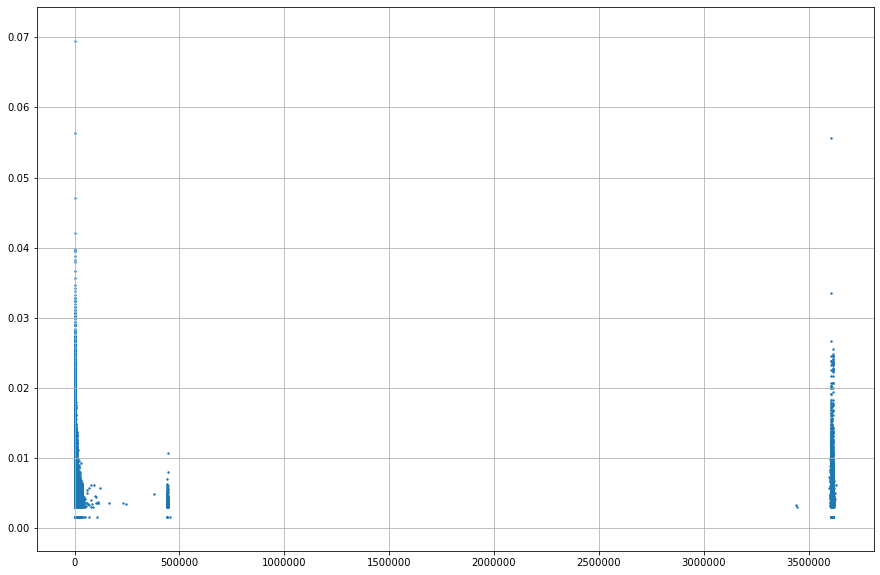

In [28]:
fig = plt.figure(figsize=(15, 10))

plt.grid()
plt.scatter(df_distance['distance_m'], df_distance["expo"], s=2, label='near')


In [29]:
humidity = pd.read_csv('humidity.csv')
humidity.datetime = pd.to_datetime(humidity.datetime)
humidity_denver = humidity[['datetime',"Denver"]]
humidity_denver.set_index("datetime", inplace=True)

In [30]:
temperature = pd.read_csv('temperature.csv')
temperature.datetime = pd.to_datetime(temperature.datetime)
temp_denver = temperature[['datetime',"Denver"]]
temp_denver.set_index("datetime", inplace=True)

In [31]:
# Let's begin with Denver only!
def interpolate_at(df, new_idxs):
    new_idxs = pd.Index(new_idxs)
    df = df.reindex(df.index.append(new_idxs).unique())    
    df = df.sort_index()
    df = df.interpolate()
    return df.loc[new_idxs]



temp_datetime = interpolate_at(temp_denver, df_distance.datetime.unique()).reset_index().rename(columns={"index":"datetime", "Denver":"Temperature"}).set_index("datetime")
humidity_datetime = interpolate_at(humidity_denver, df_distance.datetime.unique()).reset_index().rename(columns={"index":"datetime", "Denver":"Humidity"}).set_index("datetime")


In [32]:
df_ht = temp_datetime.join(humidity_datetime)

In [33]:
df = df_distance.join(df_ht, on="datetime")[df_distance.distance_m <50000]

In [96]:
columns = ["distance_m","Temperature", "Humidity"]

In [109]:
from sklearn import model_selection
X = df[columns]
X["log10"] = np.log10(X.distance_m)
X = pd.concat([X,pd.get_dummies(df.nseq)], axis=1)
y = df["rssi"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=200)
X_test

C:\Users\martinez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,distance_m,Temperature,Humidity,log10,0.0,0.5,1.0,1.5,2.0
9863,2286.841024,285.506000,67.000000,3.359236,0,0,1,0,0
29776,11010.873096,287.290000,24.333333,4.041822,0,0,1,0,0
3787,20407.209938,287.950000,53.000000,4.309784,0,0,0,0,1
23878,1948.804723,289.795000,35.000000,3.289768,0,1,0,0,0
6896,2600.882841,291.876667,28.333333,3.415121,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
34844,2831.681647,274.220000,21.000000,3.452044,0,0,1,0,0
4032,2129.504046,300.550000,31.428571,3.328278,0,0,1,0,0
34940,1118.832638,277.710000,28.000000,3.048765,1,0,0,0,0
11128,224.370253,303.103333,22.000000,2.350965,0,1,0,0,0


In [111]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression(fit_intercept=True)    
reg_model.fit(X_train[["distance_m","Temperature", "Humidity", "log10"]], y_train)   

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
import lightgbm

d_train = lightgbm.Dataset(X_train.values, y_train)
d_valid = lightgbm.Dataset(X_test.values, y_test)
    
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2'},
    'num_leaves': 40,
    'max_bin':128,
    'learning_rate': 0.02,
    'feature_fraction': 1,
    'bagging_fraction': 1,
    'bagging_freq': 5,
    'verbose': 0,
    'lambda_l2':300
}

model = lightgbm.train(params,
                       d_train,
                       valid_sets=d_valid,
                       num_boost_round=10000,
                       early_stopping_rounds=100, verbose_eval=50) 

Training until validation scores don't improve for 100 rounds
[50]	valid_0's l2: 66.5376
[100]	valid_0's l2: 62.335
[150]	valid_0's l2: 60.9493
[200]	valid_0's l2: 60.2878
[250]	valid_0's l2: 59.818
[300]	valid_0's l2: 59.4696
[350]	valid_0's l2: 59.2295
[400]	valid_0's l2: 59.0397
[450]	valid_0's l2: 58.9143
[500]	valid_0's l2: 58.7785
[550]	valid_0's l2: 58.6882
[600]	valid_0's l2: 58.5825
[650]	valid_0's l2: 58.5021
[700]	valid_0's l2: 58.4287
[750]	valid_0's l2: 58.3655
[800]	valid_0's l2: 58.3216
[850]	valid_0's l2: 58.2575
[900]	valid_0's l2: 58.1802
[950]	valid_0's l2: 58.1265
[1000]	valid_0's l2: 58.0906
[1050]	valid_0's l2: 58.0799
[1100]	valid_0's l2: 58.0837
[1150]	valid_0's l2: 58.0628
[1200]	valid_0's l2: 58.0282
[1250]	valid_0's l2: 57.976
[1300]	valid_0's l2: 57.9485
[1350]	valid_0's l2: 57.9604
[1400]	valid_0's l2: 57.9791
Early stopping, best iteration is:
[1303]	valid_0's l2: 57.9453


In [89]:
distance_pred = np.arange(1,50000)

In [116]:
test = pd.DataFrame(np.arange(1,50000), columns=["d"])

In [120]:
test["t"] = 250
test["h"] = 50
test["l"] = np.log10(distance_pred)
test["0.0"]=0
test["0.5"]=1
test["1.0"]=0
test["1.5"]=0
test["2.0"]=0


In [121]:
rssi = model.predict(test)
rssi_reg = reg_model.predict(test[["d","t","h","l"]])

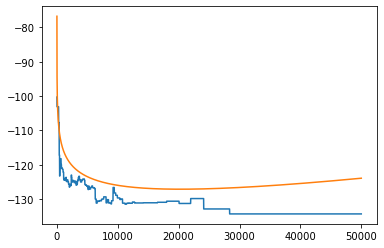

In [122]:
plt.plot(distance_pred,rssi)
plt.plot(distance_pred,rssi_reg)

#### zoom

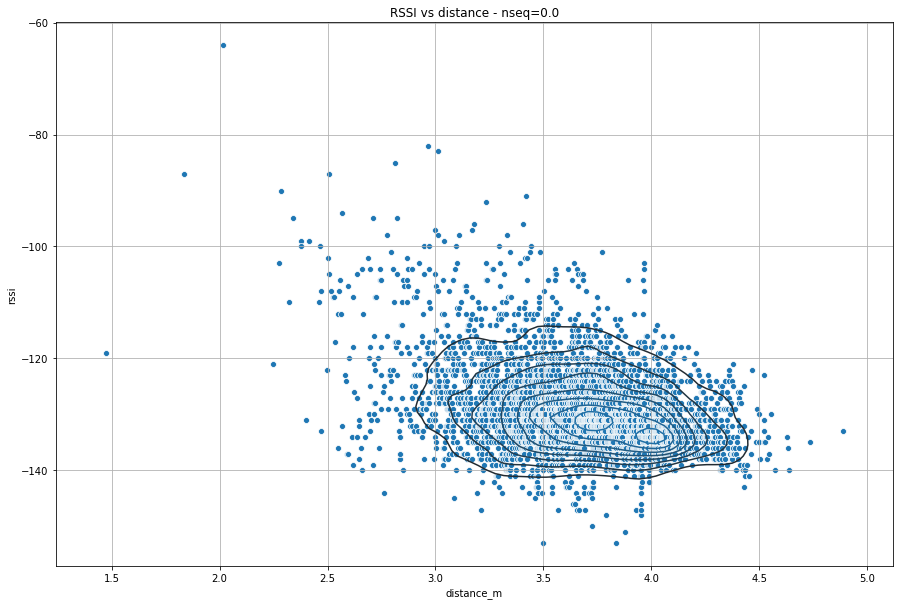

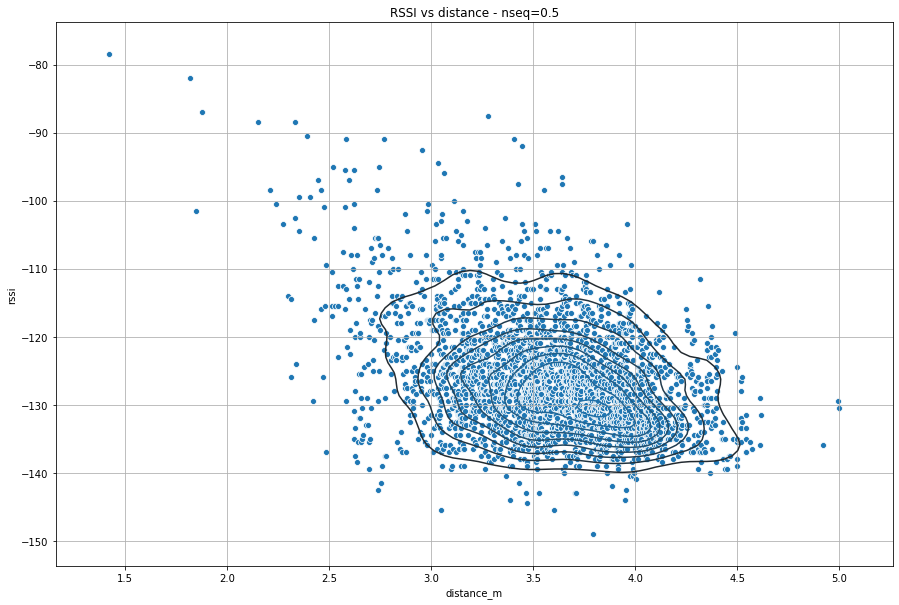

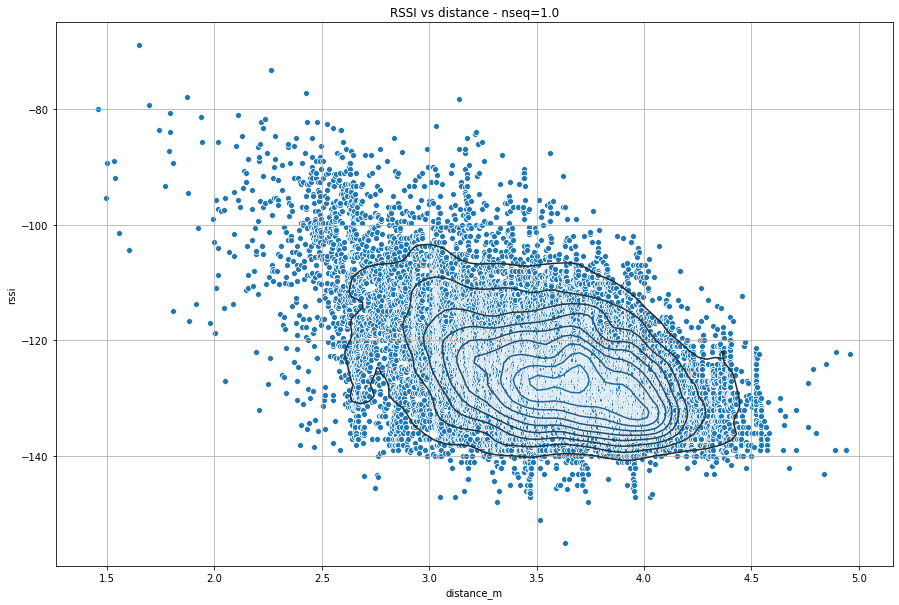

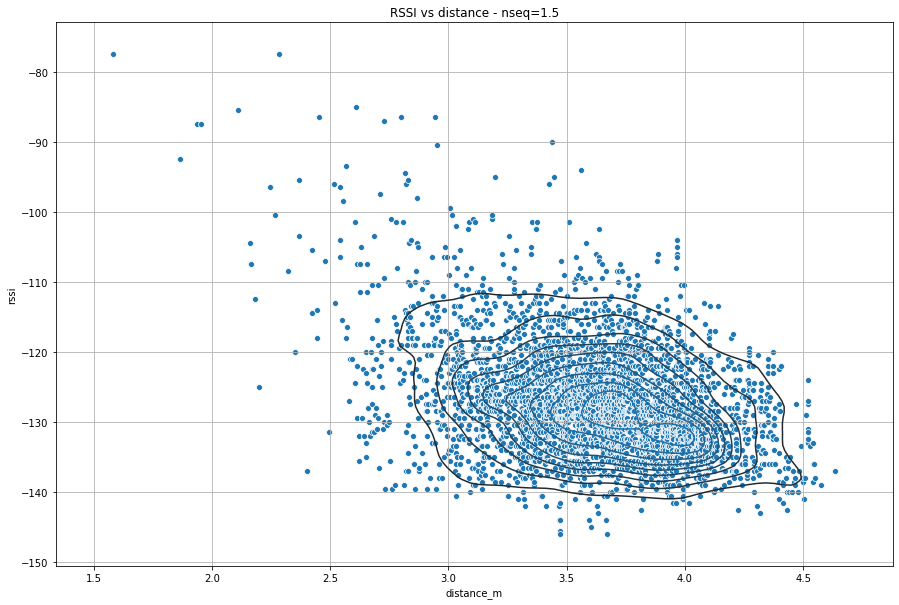

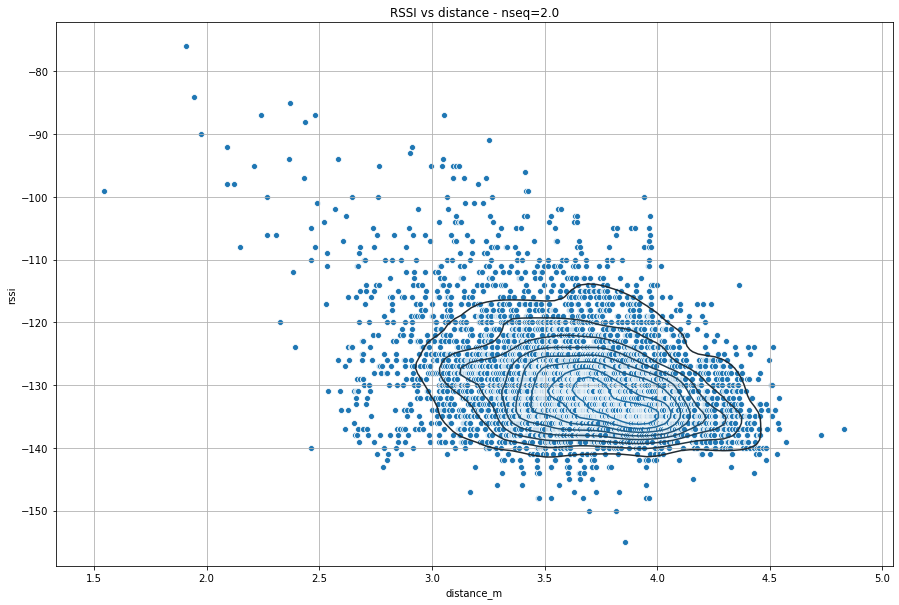

In [111]:
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

nseqs = np.sort(df_distance_near.nseq.unique())
for nseq in nseqs:
    fig = plt.figure(figsize=(15, 10))
    plt.title(f'RSSI vs distance - nseq={nseq}')
    plt.xlabel('log10(distance) (m)')
    plt.ylabel('rssi (dBm)')
    plt.grid()
    #plt.xlim(0.0, 1000.0)
    
    df_distance_near_nseq = df_distance_near[df_distance_near.nseq==nseq]
    
    sns.scatterplot(x=np.log10(df_distance_near_nseq['distance_m']), y=df_distance_near_nseq['rssi'])
    sns.kdeplot(np.log10(df_distance_near[df_distance_near.nseq==nseq]['distance_m']), df_distance_near[df_distance_near.nseq==nseq]['rssi'])    
    
    plt.show()
    


[-1.00269406e+01  2.17982094e-04]


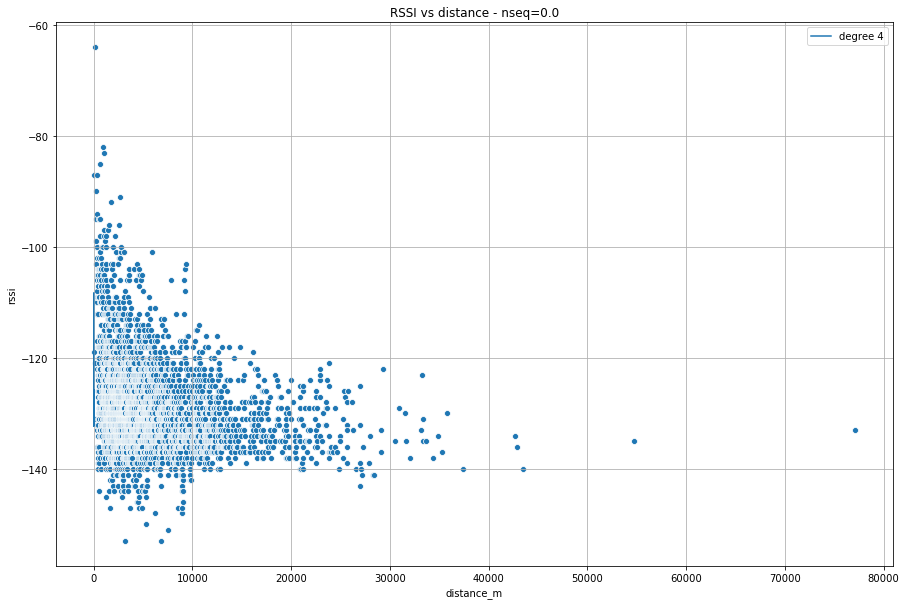

[-8.86412991e+00  1.41675252e-04]


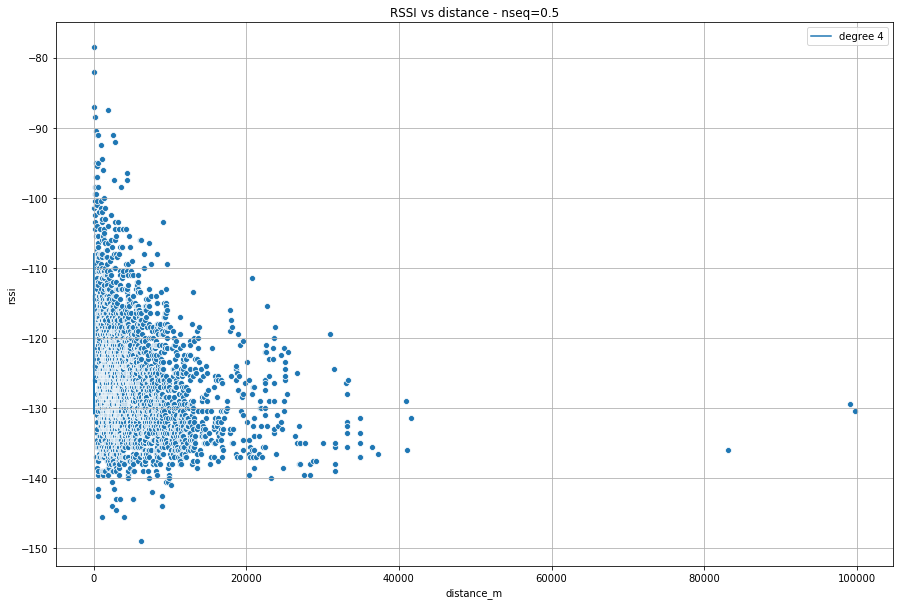

[-1.28049205e+01  2.70168680e-04]


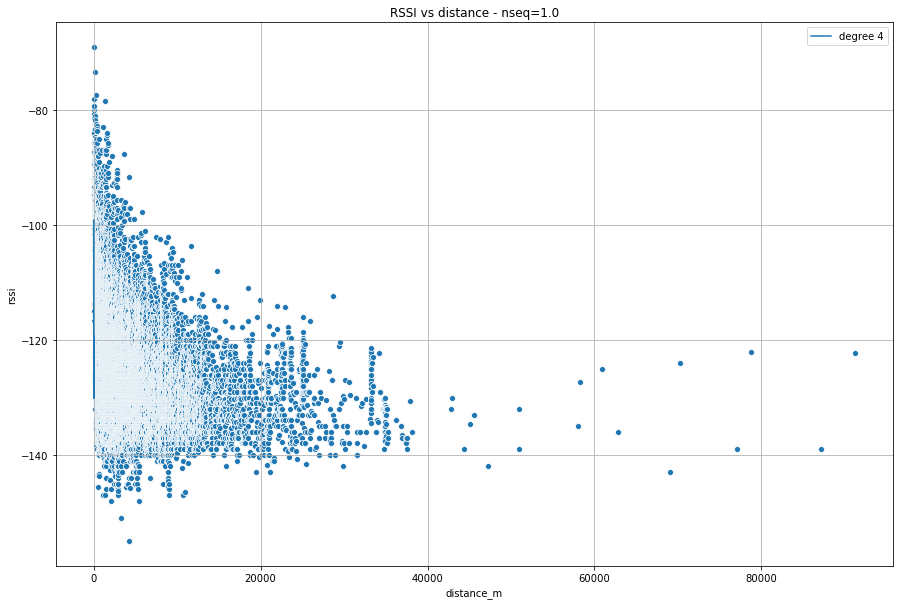

[-9.18846404e+00  1.59219544e-04]


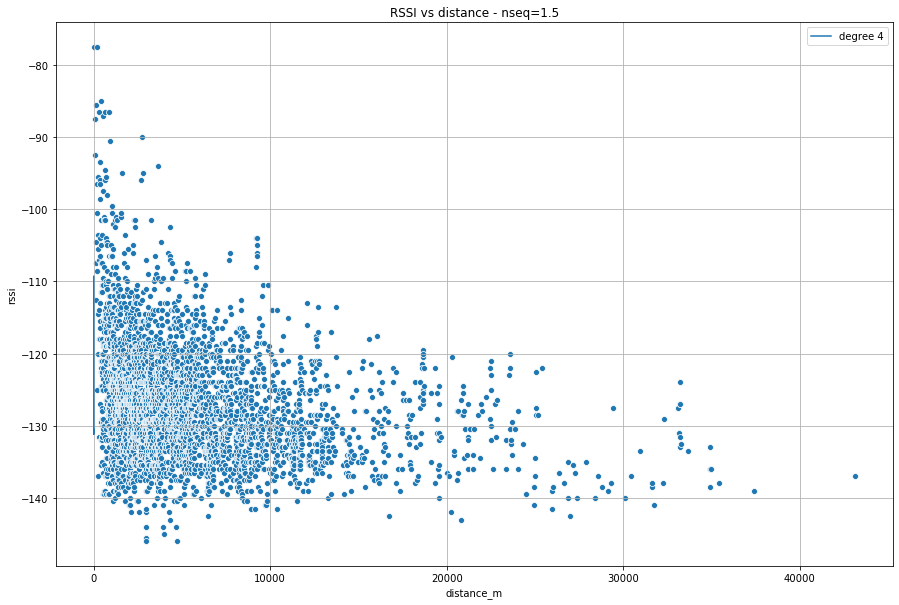

[-9.20746487e+00  1.63048011e-04]


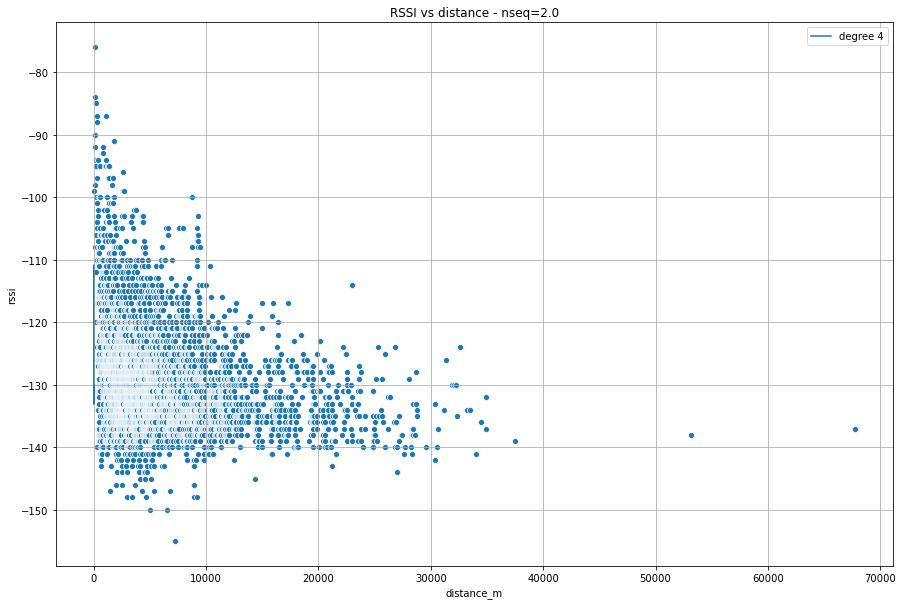

In [113]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


nseqs = np.sort(df_distance_near.nseq.unique())
for nseq in nseqs:
    fig = plt.figure(figsize=(15, 10))
    plt.title(f'RSSI vs distance - nseq={nseq}')
    plt.xlabel('distance (m)')
    plt.ylabel('rssi (dBm)')
    plt.grid()
    #plt.xlim(0.0, 10000.0)
    
    df_distance_near_nseq = df_distance_near[df_distance_near.nseq==nseq]
    
    sns.scatterplot(x=df_distance_near_nseq['distance_m'], y=df_distance_near_nseq['rssi'])
    
    model = LinearRegression(fit_intercept=True)
    
    
    X = pd.concat([np.log10(df_distance_near_nseq.distance_m), df_distance_near_nseq.distance_m], axis = 1)
    
    model.fit(X, df_distance_near_nseq.rssi)    
    
    print(model.coef_)
    
    y_plot = model.predict(X)
    plt.plot(np.log10(df_distance_near_nseq.distance_m), y_plot,
             label="degree %d" % 4)
    plt.legend()
    
    plt.show()
    


In [19]:
print(f"Nombre de messages \"courtes distances\": {df_distance_near['distance_m'].count()}")
print(f"Nombre de messages \"longues distances\": {df_distance_far['distance_m'].count()}")

Nombre de messages "courtes distances": 34674
Nombre de messages "longues distances": 4576


In [20]:
df_bsloc_near = df_distance_near.groupby('bsid')[['bs_lat', 'bs_lng']].first()
df_bsloc_far = df_distance_far.groupby('bsid')[['bs_lat', 'bs_lng']].first()

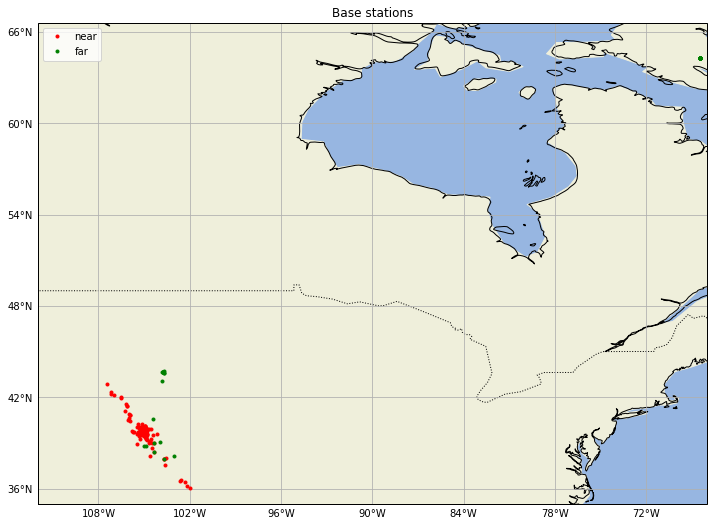

In [21]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

plt.grid()
ax.set_extent([round(lon_min - 1.), round(lon_max + 1.),
               round(lat_min - 1.), round(lat_max + 1.),])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, facecolor=cfeature.COLORS['land'])
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(resolution='50m')

# plot BS
ax.plot(df_bsloc_near['bs_lng'], df_bsloc_near['bs_lat'],
        '.', color='red', label='near')
ax.plot(df_bsloc_far['bs_lng'], df_bsloc_far['bs_lat'],
        '.', color='green', label='far')

ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_title("Base stations")
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

plt.legend()
plt.show()

In [110]:
pd.to_datetime(df_mess_test.time_ux,  unit='ms')

0       2016-05-18 03:32:32
1       2016-05-18 06:04:40
2       2016-05-18 06:04:40
3       2016-05-18 06:04:40
4       2016-05-18 06:04:40
                ...        
29281   2016-12-07 19:06:13
29282   2016-12-07 19:06:13
29283   2016-12-07 20:13:37
29284   2016-12-07 20:13:37
29285   2016-12-07 20:13:37
Name: time_ux, Length: 29286, dtype: datetime64[ns]